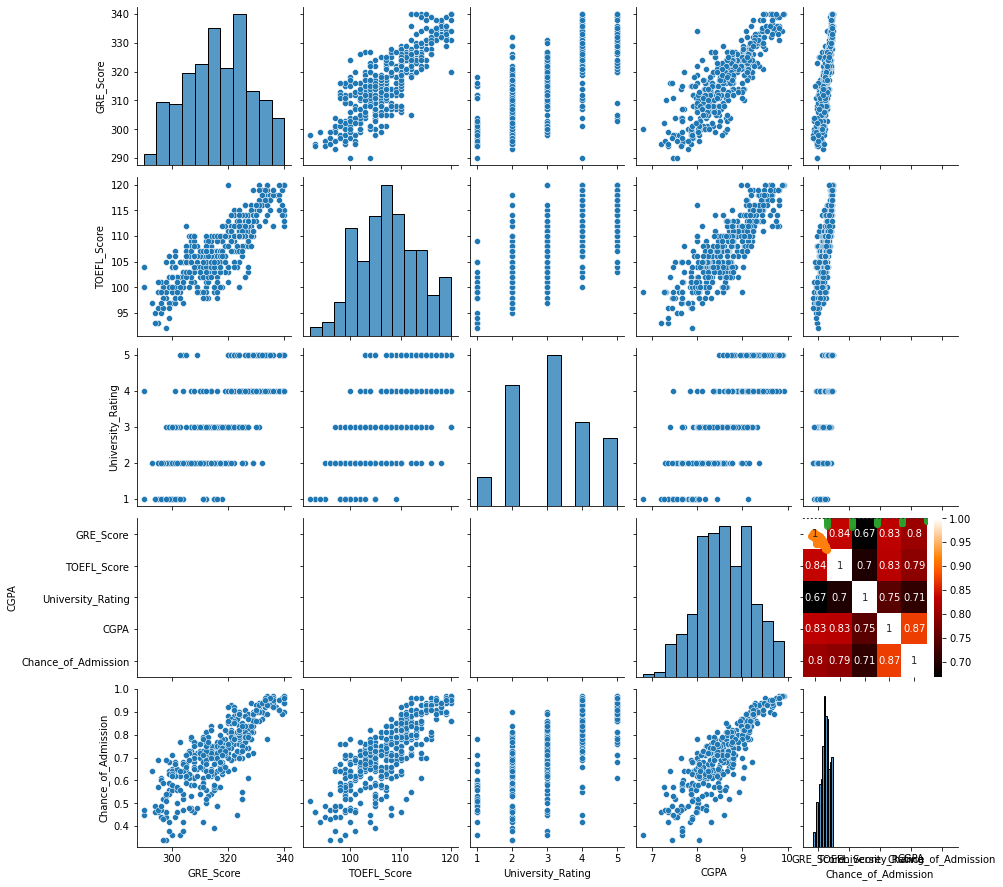

In [1]:
# import the libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# import and display the dataset 
df = pd.read_csv("Admission_Predict.csv")
df

# get the data set statistics 
df.describe()

# define variables
x = df.drop(['Chance_of_Admission'],axis = 1)
y = df.Chance_of_Admission 

# compare all the variables 
sb.pairplot(df)

# check the correlation between the variables
corr = df.corr()
sb.heatmap(corr, cmap ='gist_heat', annot =True);

# compare GRE_Score and Chance_of_Admission
sb.residplot(x = df['GRE_Score'], y = df['Chance_of_Admission'], lowess = True);

# compare TOEFL_Score and Chance_of_Admission 
sb.residplot(x = df['TOEFL_Score'], y = df['Chance_of_Admission'], lowess = True);

# compare University_Rating and Chance_of_Admission 
sb.residplot(x = df['University_Rating'], y = df['Chance_of_Admission'], lowess = True);

# compare CGPA and Chance_of_Admission 
sb.residplot(x = df['CGPA'], y = df['Chance_of_Admission'], lowess = True);

# split the data set 50/50 with the Train Test Split function from scikit-learn
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5)

# create the linear regression model using the Linear Regression function from scikit-learn
regression = LinearRegression()
regression.fit(x_train, y_train)

# test the linear regression model using the actual data chosen randomly (1st row)
# Chance_of_Admission should be close to 0.92
y_pred = regression.predict(x_test)
regression.predict([[337, 118, 4, 9.65]])

# test the linear regression model using the random data
regression.predict([[302, 102, 1, 8]])

# evaluate the mean squared error
mean_squared_error(y_test, y_pred)

# evaluate the coefficient of determination
r2_score(y_test, y_pred)

# compare actual vs predicted values of Chance_of_Admission
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Chance_of_Admission Values')

# determine the coefficients and intercept for the linear regression function in the form of 
# y = coef[0]xGRE_Score + coef[1]xTOEFL_Score + coef[2]xUniversity_Ranking + coef[3]xCGPA + intercept
coef = regression.coef_
intercept = regression.intercept_
print("Coefficients", coef)
print("Intercept", intercept)

# the actual linear regression function
# y = 0.00229479xGRE_Score + 0.00264949xTOEFL_Score + 0.0143048xUniversity_Ranking + 0.12878749xCGPA -1.4421126694286075
